# Scikit-learn examples
## IN3050/IN4050 Mandatory Assignment 2: Supervised Learning
# Updated 24-Mar-2021 with several additions

This notebook was first published with an accompaning video in week 9. The goal was to introduce scikit-learn by showing how the first part of Mandatory 2 could be solved with the aid of scikit-learn (sklearn). An additional goal was to provide results from experiments to which you could compare the results from your own implementations in Mandatory 2.

As part of the interactive session Mar 24, we extended the notebook to illustrate several additional points (not parts of Mandatory 2). They are interleaved with the earlier notebook, but the new parts are marked with headlines and numbers. They are:

1. Baseline
2. Tuning Logistic Regression
3. Plotting Decision Boundaries
4. Decision Boundaries for (X_train, t_train)
5. Polynomial Features
6. MLP
7. scikit-learn datasets

### Intialization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import random

# Part 1: Comparing classifiers
## Datasets
We start by making a synthetic dataset of 1600 datapoints and three classes, with 800 individuals in one class and 400 in each of the two other classes. (See https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs regarding how the data are generated.)

When we are doing experiments in supervised learning, and the data are not already split into training and test sets, we should start by splitting the data. Sometimes there are natural ways to split the data, say training on data from one year and testing on data from a later year, but if that is not the case, we should shuffle the data randomly before splitting. (OK, that is not necessary with this particular synthetic data set, since it is already shuffled by default by scikit, but that will not be the case with real-world data.) We should split the data so that we keep the alignment between X and t, which may be achieved by shuffling the indices. We split into 50% for training, 25% for validation, and 25% for final testing. The set for final testing *must not be used* till the and of the assignment in part 3.

We fix the seed both for data set generation and for shuffling, so that we work on the same datasets when we rerun the experiments.

In [3]:
from sklearn.datasets import make_blobs
X, t = make_blobs(n_samples=[400,800,400], centers=[[0,0],[1,2],[2,3]], 
                  n_features=2, random_state=2019)

In [4]:
indices = np.arange(X.shape[0])
random.seed(2020)
random.shuffle(indices)
indices[:10]

array([1301,  293,  968,  624,  658,  574,  433,  368,  512,  353])

In [5]:
X_train = X[indices[:800],:]
X_val = X[indices[800:1200],:]
X_test = X[indices[1200:],:]
t_train = t[indices[:800]]
t_val = t[indices[800:1200]]
t_test = t[indices[1200:]]

Next, we will  make a second dataset by merging the two smaller classes in (X,t) and call the new set (X, t2). This will be a binary set.

In [6]:
t2_train = t_train == 1
t2_train = t2_train.astype('int')
t2_val = (t_val == 1).astype('int')
t2_test = (t_test == 1).astype('int')

Plot the two training sets.

In [7]:
# Your solution

#### Solution

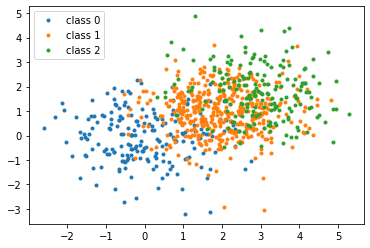

In [8]:
show(X_train, t_train)

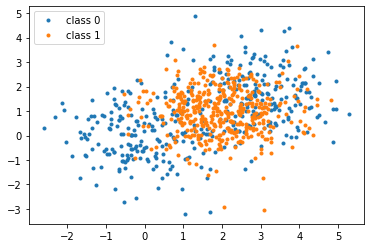

In [9]:
show(X_train, t2_train)

## Binary classifiers

## 1. Baseline

When you run classification experiments, it is always useful to establish a baseline to which you can compare your results. Has the system learned anything? Does it beat the baseline? The following are the most basic baselines. You can easily implement them yourself or you can borrow them e.g., from scikit learn.

In [10]:
from sklearn.dummy import DummyClassifier

In [11]:
# DummyClassifier?

A majority-class baseline finds the most frequent class in the training data and predicts all items to this class.

In [12]:
majority_cl = DummyClassifier(strategy='most_frequent')
majority_cl.fit(X_train, t_train)
majority_cl.score(X_val, t_val)

0.4725

Beware that in this dataset one of the three classes is as large as the other two classes collected. The expectation is 0.5. Because of randomness in splitting between training, validation, and test set, the result is not excatly 0.5

The random classifier assigns classes randomly in accordance with the distribution in the training set. This is chosen by setting the `startegy='stratified'`. (This used to be the default choice, but that is currently about to change.)


If the distribution in the training set is 0.5-0.25-0.25, the expected accuracy on the validation set should be 0.5^2 + 2*(0.25^2)=0.375. Since the classification is done randomly, you should expect to get different results when you repeat the experiment.

In [13]:
random_cl = DummyClassifier(strategy='stratified')
random_cl.fit(X_train, t_train)
random_cl.score(X_val, t_val)

0.4025

By repeating several times, we can observe this randomness. 

By taking the average, we can a better estimate.

In [14]:
scores = 0
for i in range(10):
    score = random_cl.score(X_val, t_val)
    print(score)
    scores += score
    
print("\nAverage score: ", round(scores/10, 4))

0.365
0.405
0.4025
0.355
0.4075
0.355
0.3475
0.395
0.355
0.365

Average score:  0.3753


## Binary classifiers

### Linear regression
### Logistic regression

In [15]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier

In [16]:
lin_reg_cl = RidgeClassifier()
lin_reg_cl.fit(X_train, t2_train)

RidgeClassifier()

In [17]:
# RidgeClassifier?

In [18]:
lin_reg_cl.predict(X_val[:10, :])

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [19]:
t2_val[:10]

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0])

In [20]:
# Accuracy
lin_reg_cl.score(X_val, t2_val)

0.6075

In [21]:
log_reg_cl = LogisticRegression()
log_reg_cl.fit(X_train, t2_train)

LogisticRegression()

In [22]:
# LogisticRegression?

In [23]:
log_reg_cl.score(X_val, t2_val)

0.6075

## 2: Tuning Logistic Regression

We have considered applying regularization to logistic regression before, and tuned the regularization. We apply it to this task to see how good results we can get compared to our own implementations of Mandatory 2 without regularization.

In [24]:
# LogisticRegression?

In [25]:
for c in [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]:
    cl = LogisticRegression(C=c)
    cl.fit(X_train, t2_train)
    scor = cl.score(X_val, t2_val)
    print(c, scor)

0.0001 0.4725
0.001 0.6525
0.01 0.625
0.1 0.605
1.0 0.6075
10.0 0.6075
100.0 0.6075


In [26]:
for c in [0.0005, 0.0009, 0.001, 0.002, 0.003]:
    cl = LogisticRegression(C=c)
    cl.fit(X_train, t2_train)
    scor = cl.score(X_val, t2_val)
    print(c, scor)

0.0005 0.595
0.0009 0.6525
0.001 0.6525
0.002 0.655
0.003 0.6475


In [27]:
for a in range(20):
    c = 0.001 + 0.0001*a
    cl = LogisticRegression(C=c)
    cl.fit(X_train, t2_train)
    scor = cl.score(X_val, t2_val)
    print("{:7.4f}  {}".format(c, scor))

 0.0010  0.6525
 0.0011  0.655
 0.0012  0.6625
 0.0013  0.6675
 0.0014  0.6675
 0.0015  0.6625
 0.0016  0.6625
 0.0017  0.665
 0.0018  0.6625
 0.0019  0.66
 0.0020  0.655
 0.0021  0.655
 0.0022  0.655
 0.0023  0.6575
 0.0024  0.6575
 0.0025  0.6575
 0.0026  0.6525
 0.0027  0.655
 0.0028  0.65
 0.0029  0.6475


In [28]:
log_reg_best_cl = LogisticRegression(C=0.0014)
log_reg_best_cl.fit(X_train, t2_train)
log_reg_best_cl.score(X_val, t_val)

0.6625

## Binary classifiers

### Perceptron
### *k*NN

In [29]:
per_cl = Perceptron()
per_cl.fit(X_train, t2_train)

Perceptron()

In [30]:
per_cl.score(X_val, t2_val)

0.555

In [31]:
kNN_cl_7 = KNeighborsClassifier(n_neighbors=7)
kNN_cl_7.fit(X_train, t2_train)

KNeighborsClassifier(n_neighbors=7)

In [32]:
kNN_cl_7.score(X_val, t2_val)

0.735

## 3. Plotting Decision Boundaries

Using the tools from http://rasbt.github.io/mlxtend/. You have to install the package first. If you have used anaconda to install the environment, you may use conda to install the package as well.

With the package installed, we have to import the function we will use. There is only one function we will use `plot_decision_regions`.

In [33]:
from mlxtend.plotting import plot_decision_regions

In [34]:
# plot_decision_regions?

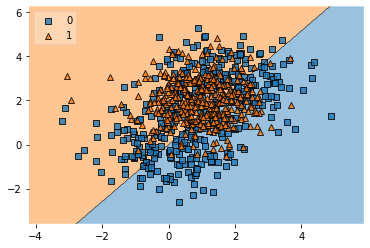

In [35]:
plot_decision_regions(X_train, t2_train, clf=per_cl, legend=2)

We observe that the perceptron has learned much. We may compare the various algorithms.

In [36]:
import matplotlib.gridspec as gridspec
import itertools

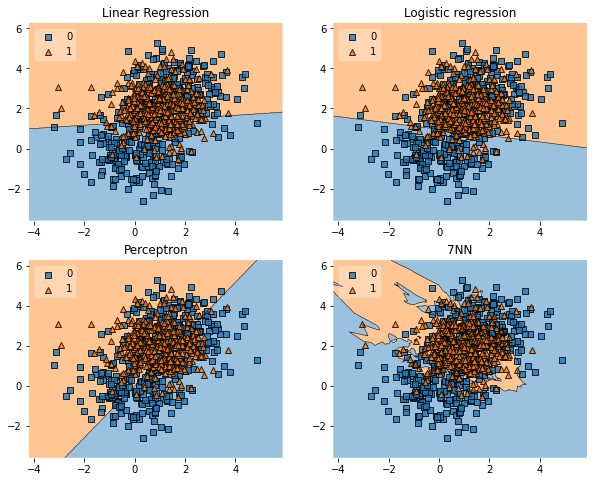

In [37]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Linear Regression', 'Logistic regression','Perceptron', '7NN']
for clf, lab, grd in zip([lin_reg_cl, log_reg_best_cl, per_cl, kNN_cl_7],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, t2_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=t2_train, clf=clf, legend=2)
    plt.title(lab)

By only showing 1 out of 4 points, it might be easier to see the boundaries and the relationship between the datapoints in the training set and the boundaries.

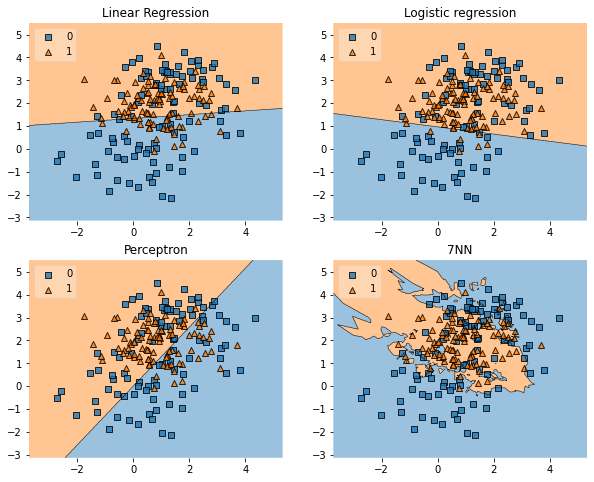

In [38]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Linear Regression', 'Logistic regression','Perceptron', '7NN']
for clf, lab, grd in zip([lin_reg_cl, log_reg_best_cl, per_cl, kNN_cl_7],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, t2_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train[:200,:], y=t2_train[:200], clf=clf, legend=2)
    plt.title(lab)

### Scaling example
We are using the StandardScaler(). There are also other scalers.

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [41]:
lin_sc = RidgeClassifier().fit(X_train_scaled, t2_train)
lin_sc.score(X_val_scaled, t2_val)

0.6075

In [42]:
log_sc = LogisticRegression().fit(X_train_scaled, t2_train)
log_sc.score(X_val_scaled, t2_val)

0.6075

## Multi-class classifiers
We now turn to the task of classifying when there are more than two classes, and the task is to ascribe one class to each input. We will now use the set (X, t).

### Logistic regression "one-vs-rest"
We saw in the lecture how a logistic regression classifier can be turned into a multi-class classifier using the one-vs-rest approach. We train one classifier for each class and assign the class which ascribes the highest probability.

Extend the logisitc regression classifier to a multi-class classifier. To do this, you must modify the target values from scalars to arrays. Train the resulting classifier on (X_train, t_train), test it on (X_val, t_val), and report the accuracy.

In [43]:
log_reg_cl = LogisticRegression(multi_class='ovr')
log_reg_cl.fit(X_train, t_train)

LogisticRegression(multi_class='ovr')

In [44]:
log_reg_cl.score(X_val, t_val)

0.7675

In [45]:
softmax_cl = LogisticRegression(multi_class='multinomial')
softmax_cl.fit(X_train, t_train)

LogisticRegression(multi_class='multinomial')

In [46]:
softmax_cl.score(X_val, t_val)

0.7675

In [47]:
log_reg_cl.score(X_train, t_train)

0.73

In [48]:
softmax_cl.score(X_train, t_train)

0.73875

## 4. Decision Boundaries for (X_train, t_train)

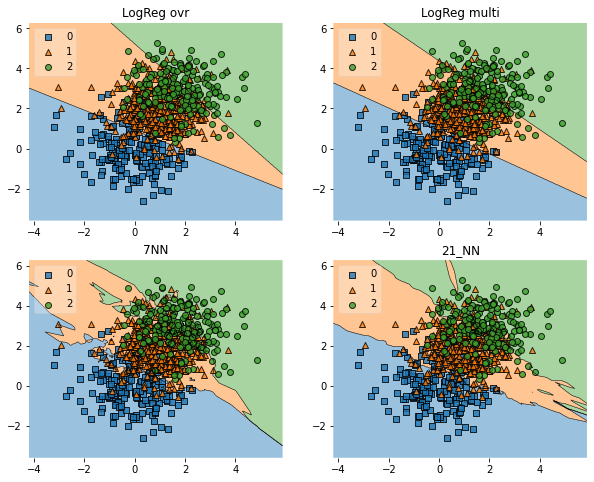

In [49]:
ovr = LogisticRegression(multi_class='ovr')
multi = LogisticRegression(multi_class='multinomial')
kNN_cl_7 = KNeighborsClassifier(n_neighbors=7)
kNN_cl_21 = KNeighborsClassifier(n_neighbors=21)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['LogReg ovr', 'LogReg multi', '7NN', '21_NN']
for clf, lab, grd in zip([ovr, multi, kNN_cl_7, kNN_cl_21],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, t_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=t_train, clf=clf, legend=2)
    plt.title(lab)

### Apply to Mandatory 2.
You may import the `plot_decision_regions` into your solution to Mandatory 2. You can then plot the decision boundaries and compare to the plots above, as long as your classifiers take data in the (X, y) numpy format and has a predict method.

## 5. Polynomial Features

In Mandatory 2, we add three polynomial features. The classifier takes 5 input features (+ bias). The classifier itself is still linear (except *k*NN, of course). In scikit-learn, we can use a `Pipeline()`. The effect of the pipeline below is the same as the effect of our implementation (+ scaling). The difference is that we may consider the whole pipeline as one non-linear classifier of two features and we can plot the result.

This is not part of the syllabus. If you are interested in knowing more, consider the scikit learn documantation.

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

poly_log_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2)),
    ("scaler", StandardScaler()),
    ("lr_poly_cl", LogisticRegression())
])

In [51]:
poly_log_reg.fit(X_train, t2_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('lr_poly_cl', LogisticRegression())])

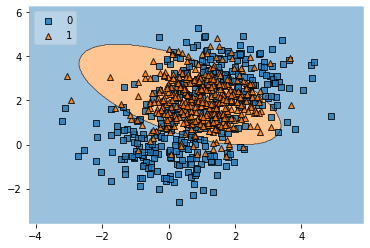

In [52]:
plot_decision_regions(X_train, t2_train, clf=poly_log_reg, legend=2)

In [53]:
poly_log_reg.score(X_val, t2_val)

0.735

## 6. MLP

Scikit-learn also contains a MLP classifier. To keep it easy, we use that one, instead of switching to TensorFlow.

Beware that the classifier has many parameters, and the settings you make are determinative for your results. You may experiment with various settings. Consider the documantation for `MLPClassifier`.

In [54]:
# MLPClassifier?

In [55]:
from sklearn.neural_network import MLPClassifier

In [56]:
scaler = StandardScaler()

In [57]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [58]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd',
                       alpha=0.0)

In [59]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(8,), activation='logistic', 
                       learning_rate_init=0.001, batch_size=800, max_iter=10000, alpha=0.0)

In [60]:
mlp_clf.fit(X_train_scaled, t_train)

MLPClassifier(activation='logistic', alpha=0.0, batch_size=800,
              hidden_layer_sizes=(8,), max_iter=10000)

In [61]:
mlp_clf.score(X_val_scaled, t_val)

0.7625

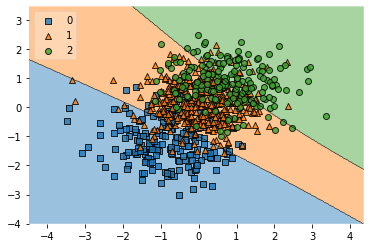

In [62]:
plot_decision_regions(X_train_scaled, t_train, clf=mlp_clf, legend=2)

In [63]:
mlp_clf = MLPClassifier(activation='logistic', alpha=0.0, 
              hidden_layer_sizes=(8,), max_iter=10000)
mlp_clf.fit(X_train_scaled, t2_train)

MLPClassifier(activation='logistic', alpha=0.0, hidden_layer_sizes=(8,),
              max_iter=10000)

In [64]:
mlp_clf.score(X_val_scaled, t2_val)

0.6

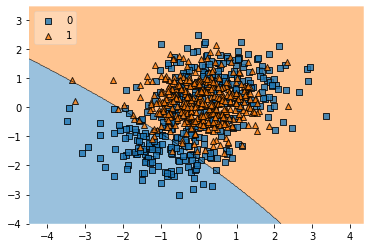

In [65]:
plot_decision_regions(X_train_scaled, t2_train, clf=mlp_clf, legend=2)

## 7. scikit-learn Datasets

Scikit-learn contains several sythetic (toy) datasets which are hard for linear classifiers. We try to learn them by MLP below. You are invited to experiment with them with various parameter settings. These datasets are great for testing your implementation of MLP in Mandatory 2.

In [66]:
from sklearn.datasets import make_circles

In [67]:
# make_circles?

In [68]:
Xc, tc = make_circles(n_samples=200, random_state=0)

In [69]:
circle_mlp_clf = MLPClassifier(max_iter=80)
circle_mlp_clf.fit(Xc, tc)
circle_mlp_clf.score(Xc, tc)

C:\Users\jtl_adm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.91

(-2.0, 2.0, -2.0, 2.0)

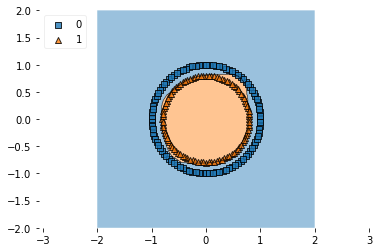

In [70]:
plot_decision_regions(Xc, tc, clf=circle_mlp_clf, legend=2)
plt.axis('equal')

In [71]:
from sklearn.datasets import make_moons

In [72]:
# make_moons?

In [73]:
Xc, tc = make_moons(n_samples=200, random_state=0)

In [74]:
circle_mlp_clf = MLPClassifier(max_iter=800)
circle_mlp_clf.fit(Xc, tc)
circle_mlp_clf.score(Xc, tc)

C:\Users\jtl_adm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.98

(-2.0, 3.0, -1.4998741276738752, 1.9998741276738752)

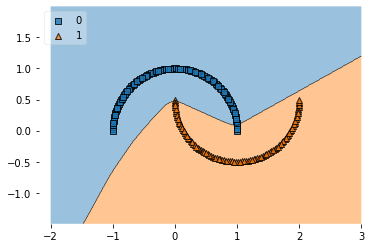

In [75]:
plot_decision_regions(Xc, tc, clf=circle_mlp_clf, legend=2)
plt.axis('equal')

In [76]:
Xc, tc = make_moons(n_samples=200, noise=0.2, random_state=0)

In [77]:
circle_mlp_clf = MLPClassifier(max_iter=800)
circle_mlp_clf.fit(Xc, tc)
circle_mlp_clf.score(Xc, tc)

C:\Users\jtl_adm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.945

(-2.354620411771002, 3.255363020128324, -1.9320638231557181, 2.341610445815469)

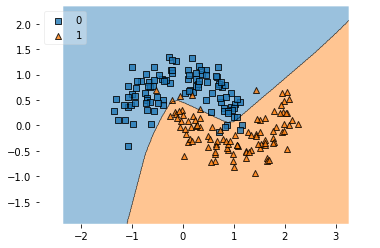

In [78]:
plot_decision_regions(Xc, tc, clf=circle_mlp_clf, legend=2)
plt.axis('equal')